In [23]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import fftpack
from numpy import savetxt
from scipy.signal import lfilter, firwin

In [24]:
fpga_sig = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177,196,144,0,216,226,136,96,128,177,196,16,0,216,226,136,32,128,177,196,16,0,216,226,136,32,128,177,196,16,0,216,226,136,32,128,177,196,16,0,216,226,136,32,128,177,196,16,0,216,226,136,32,128,177,196,16,0,216,226,136,32,128,177,196,16,0,216,226,136,32,128,177,196,16,0,216,226,136,96,0,177,196,144,0,216,226,136,96,0,177,196,144,0,216,226,136,96,0])

fpga_sig = fpga_sig/2
t = np.arange(len(fpga_sig))

input_sig = []

a = False
for i in range(200):
    if(a):
        input_sig.append(120)
    if(not a):
        input_sig.append(20)
    if(i % 10 == 0):
        a = not a

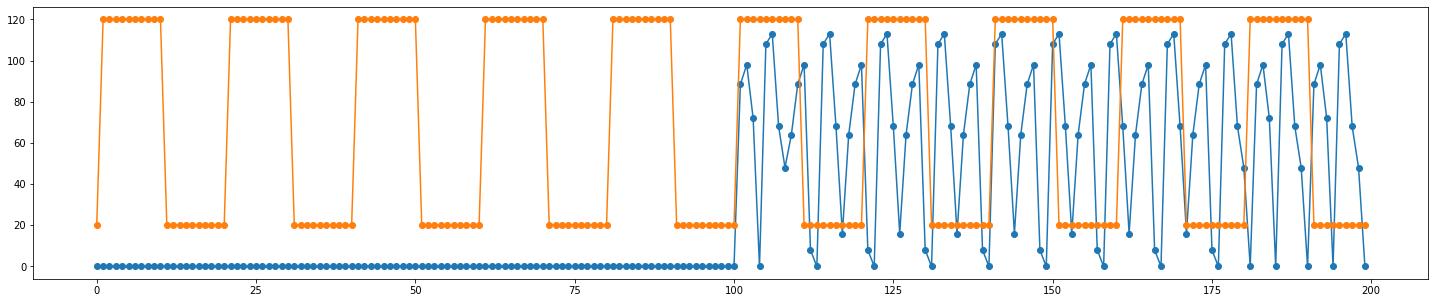

In [25]:
plt.figure(figsize=(25, 5))
plt.plot(t, fpga_sig, '-o')
plt.plot(t, input_sig, '-o')

Text(0, 0.5, 'power')

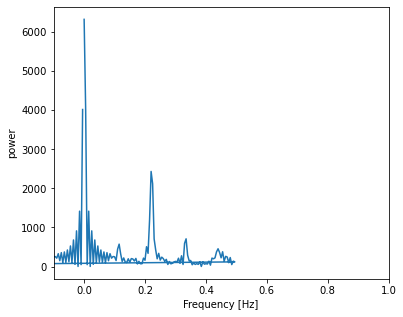

In [26]:
# The FFT of the signal
fpga_fft = fftpack.fft(fpga_sig)

# And the power (sig_fft is of complex dtype)
fpga_power = np.abs(fpga_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(fpga_sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.xlim(-.1,1)
plt.plot(sample_freq, fpga_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

Text(0, 0.5, 'power')

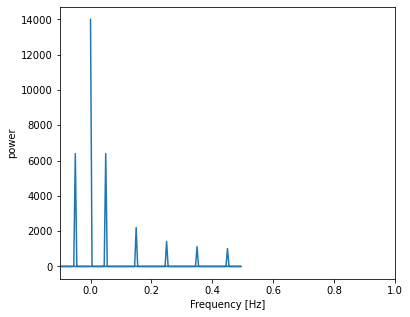

In [27]:
# The FFT of the signal
input_fft = fftpack.fft(input_sig)

# And the power (sig_fft is of complex dtype)
input_power = np.abs(input_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(fpga_sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.xlim(-.1,1)
plt.plot(sample_freq, input_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

## Getting the coefficients

In [28]:
numtaps = 4 #the higher it is, the more precise

In [29]:
f = 0.1

c = signal.firwin(numtaps, f)
#print(c)

The trasformation law is:
$$Y[n]=C_0X[n]+C_1X[n-1]+C_2X[n-2]+C_3X[n-3]$$

In [30]:
python_sig = lfilter(c, 1.0, input_sig)

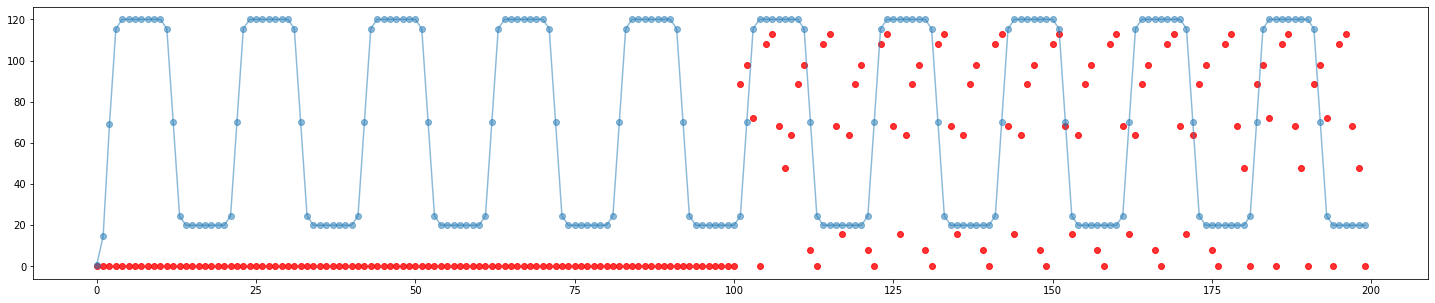

In [31]:
plt.figure(figsize=(25, 5))
plt.plot(t, python_sig, '-o', alpha = .5)
plt.scatter(t, fpga_sig, alpha = .8, color='r')